# Modeling Spiketrains

## Poisson Spiketrain

$$
P\{\text{1 spike during }\delta t\} = r\delta t
$$

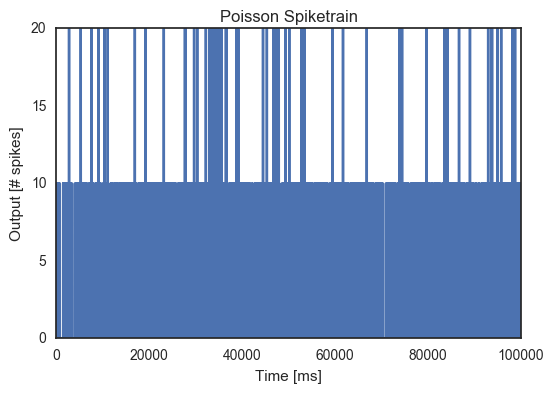

935 935 935


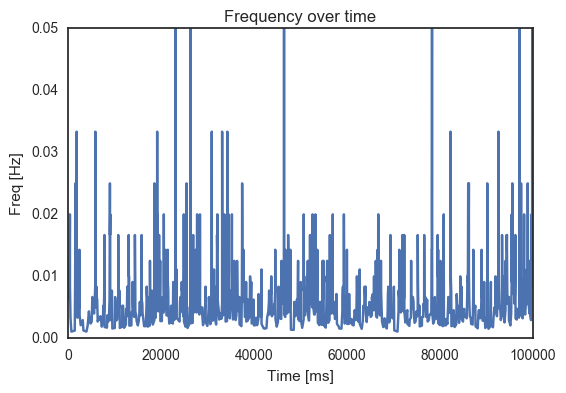

In [2]:
import numpy as np
from pylab import *
import seaborn as sns

def calc_freq(spiketimes):
    s1 = np.concatenate([spiketimes[0:1],spiketimes[:-1]])
    s2 = np.concatenate([spiketimes[1:],spiketimes[-1:]])
    print(len(s1), len(s2), len(spiketimes))
    return 1/(s2 - s1)

sns.set_style("white")
%matplotlib inline

nb_samples = 10000

rate = 1
dt = 10 #ms
rate = np.random.poisson(0.1, size=(nb_samples,))
xx = rate * dt
tt = np.linspace(0,nb_samples*dt,nb_samples)

plot(tt, xx)
xlabel("Time [ms]")
ylabel("Output [# spikes]")
title("Poisson Spiketrain")
show()

spike_times = tt[xx > 0.5]
freqs = calc_freq(spike_times)

plot(spike_times, freqs)
xlabel("Time [ms]")
ylabel("Freq [Hz]")
title("Frequency over time")
show()

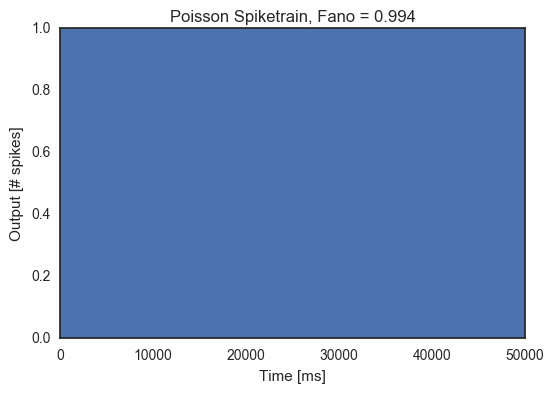

25141 25141 25141


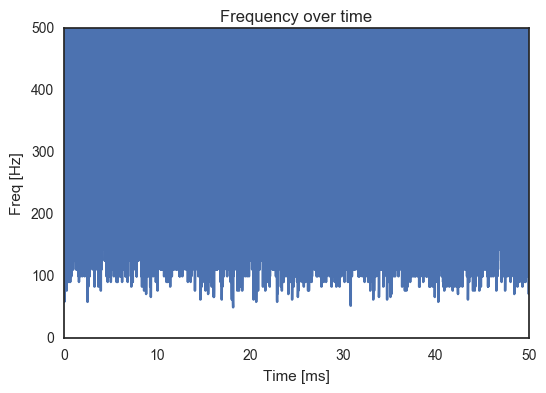

In [3]:
import numpy as np
from pylab import *
%matplotlib inline

nb_samples = 50000

r = 500
dt = 0.001 #ms
tt = np.linspace(0,nb_samples*dt,nb_samples)
xx = (np.random.uniform(0,1,size=(nb_samples)) > dt*r).astype("float32")

plot(tt*1000, xx)
xlabel("Time [ms]")
ylabel("Output [# spikes]")
title("Poisson Spiketrain, Fano = {:.3f}".format(r*dt/xx.mean()))
show()

spike_times = tt[xx > 0.5]
freqs = calc_freq(spike_times)

plot(spike_times, freqs)
xlabel("Time [ms]")
ylabel("Freq [Hz]")
title("Frequency over time")
show()

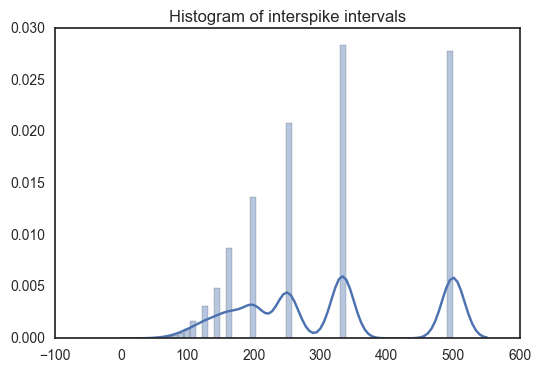

In [4]:
import seaborn as sns

sns.distplot(freqs)
title("Histogram of interspike intervals")
show()

## Convolution with different windows

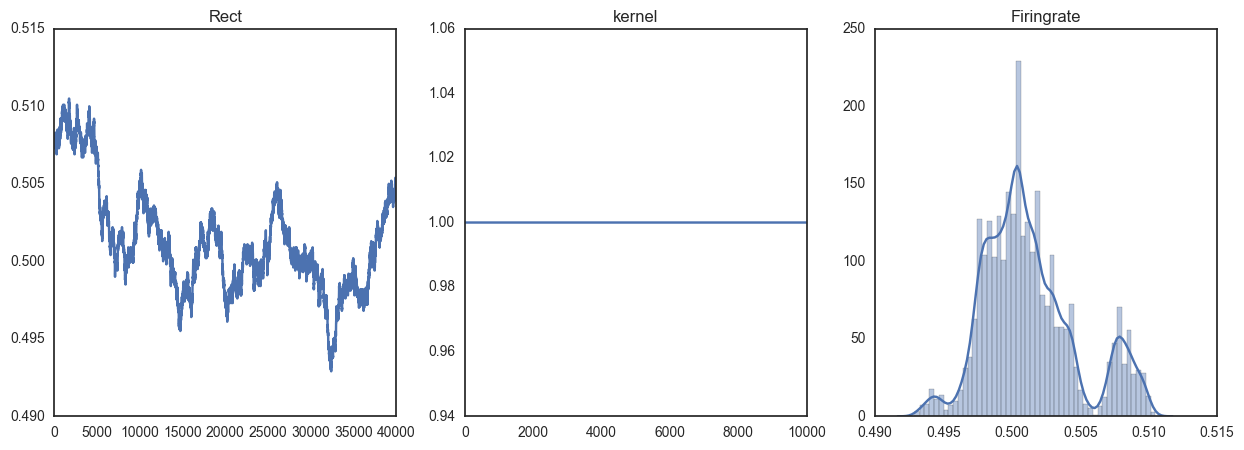

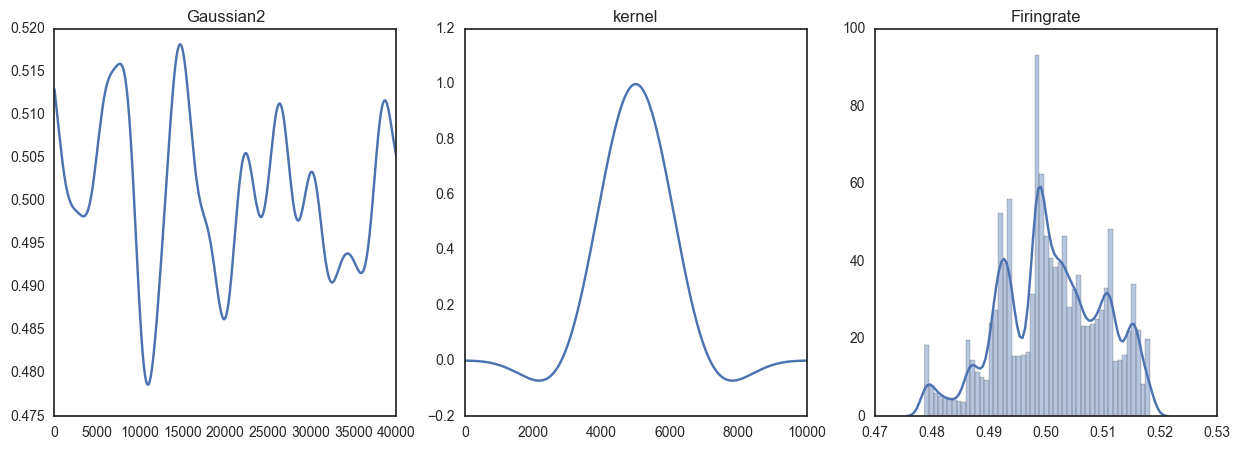

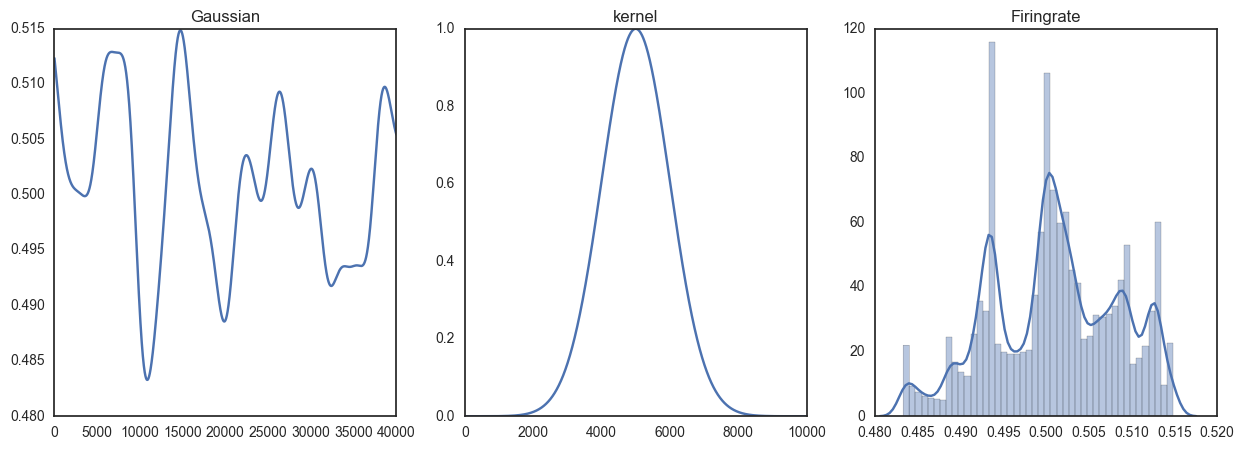

In [5]:
from scipy.signal import gaussian, flattop, boxcar, convolve

filter_size = int(10 / dt)

kernels = {"Gaussian" : gaussian(filter_size,filter_size//10),
           "Gaussian2" : flattop(filter_size),
           "Rect" : boxcar(filter_size)}

for key in kernels.keys():
    k = kernels[key]
    firerate = convolve(xx, k/k.sum(), mode="valid")
    
    figure(figsize=(15,5))
    subplot(1,3,1)
    plot(firerate)
    title(key)
    subplot(1,3,2)
    plot(k)
    title("kernel")
    subplot(1,3,3)
    sns.distplot(firerate, norm_hist=True)
    xlim()
    title("Firingrate")
    show()

0.240918


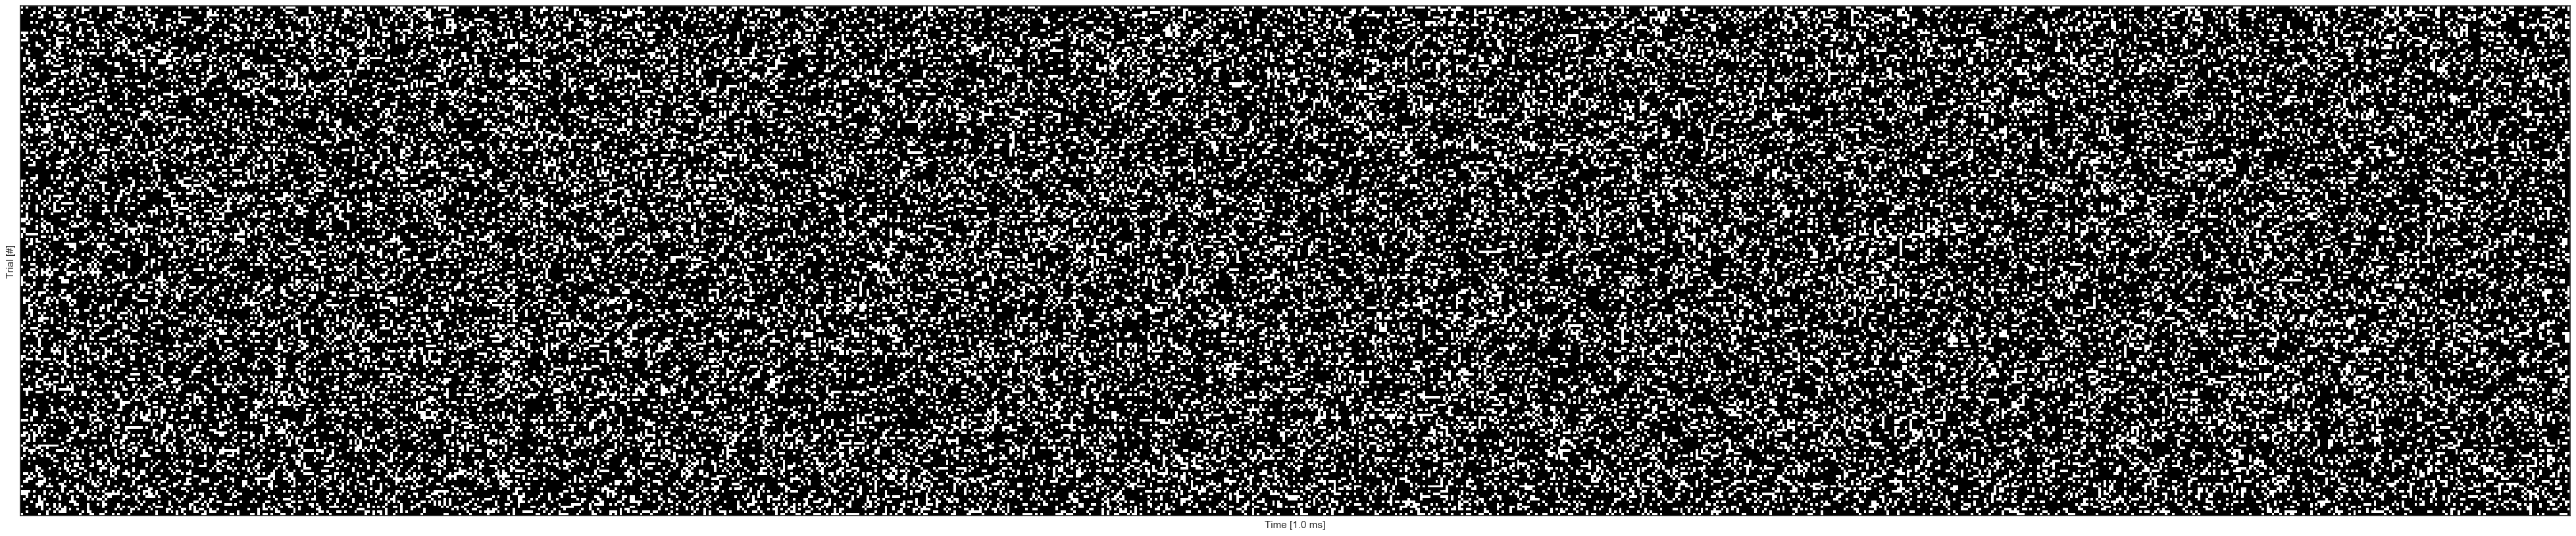

In [37]:
import numpy as np
from pylab import *
%matplotlib inline

def calc_freq(spiketimes):
    s1 = np.concatenate([spiketimes[0:1],spiketimes[:-1]])
    s2 = np.concatenate([spiketimes[1:],spiketimes[-1:]])
    print(len(s1), len(s2), len(spiketimes))
    return 1/(s2 - s1)

def poisson_process(nb_trials, samples_per_trial, r = 100, dt = 0.005):
    assert r*dt < 1
    
    tt = np.linspace(0,samples_per_trial*dt,samples_per_trial)
    xx = (np.random.uniform(0,1,size=(nb_trials,) + tt.shape) > dt*r).astype("float32")
    
    return tt, xx
    
def spikeplot(time, spikes):
    figure(figsize=(50,10))
    imshow(spikes, interpolation="none")
    xticks([])
    yticks([])
    
total_time = 1
dt = 0.001
time, spikes = poisson_process(200, int(total_time/dt), r=250, dt=dt)

r_per_trial = spikes.sum(axis=1)/total_time  # spikes per second
r_per_trial2 = spikes.mean(axis=1)/dt  # spikes per second

assert np.allclose(r_per_trial, r_per_trial2)

print(r_per_trial.var(axis=0) / r_per_trial.mean(axis=0))

spikeplot(time, spikes)
xlabel("Time [{} ms]".format(1000*dt))
ylabel("Trial [#]")
show()